In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y = np.sin(x)

In [5]:
#y

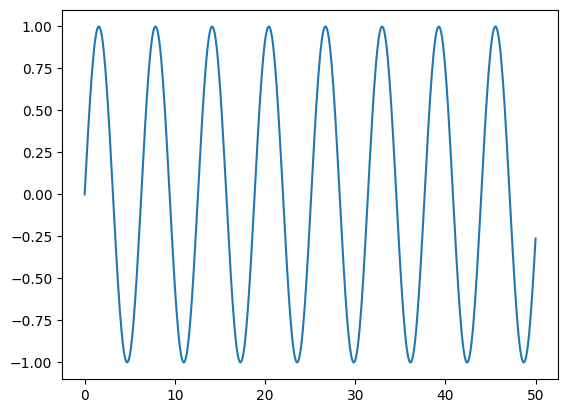

In [6]:
plt.plot(x,y)

In [7]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [8]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Train Test Split

In [9]:
len(df)

501

In [10]:
test_percent = 0.1

In [11]:
len(df)*test_percent

50.1

In [12]:
test_point = np.round(len(df)*test_percent)

In [13]:
test_ind = int(len(df) - test_point)

In [14]:
test_ind

451

In [15]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [16]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [17]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


## Scale Data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler()

In [21]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [22]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [45]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [46]:
len(scaled_train)

451

In [47]:
len(generator) # n_input = 2 , generator = scaled_train-length

401

In [48]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [49]:
X,y = generator[0]

In [50]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [51]:
y

array([[0.02053313]])

In [73]:
length = 50
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [74]:
X,y = generator[0]

In [75]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [76]:
y

array([[0.02053313]])

## Create the Model

In [77]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN

In [78]:
# We're only using one feature in our time series
n_features = 1 

In [79]:
model = Sequential()

model.add(SimpleRNN(50,input_shape = (length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')


In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


C:\Users\Emirhan\AppData\Local\Temp\ipykernel_3624\1246993970.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


401/401 [==============================] - 17s 40ms/step - loss: 0.0051
Epoch 2/5
401/401 [==============================] - 15s 39ms/step - loss: 8.3949e-05
Epoch 3/5
401/401 [==============================] - 15s 38ms/step - loss: 4.0573e-04
Epoch 4/5
401/401 [==============================] - 15s 38ms/step - loss: 4.2758e-05
Epoch 5/5
401/401 [==============================] - 15s 39ms/step - loss: 6.7486e-05


In [82]:
model.history.history.keys()

dict_keys(['loss'])

<Axes: >

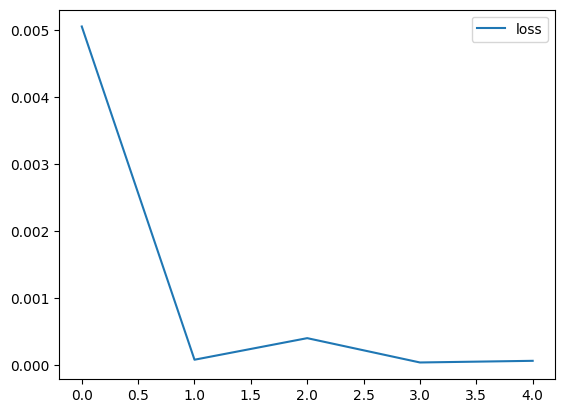

In [83]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [84]:
first_eval_batch = scaled_train[-length:]

In [85]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [89]:
first_eval_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [87]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 144ms/step


array([[0.94686544]], dtype=float32)

In [92]:
scaled_test[0]

array([0.94955134])

In [111]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

In [112]:
current_batch.shape

(1, 50, 1)

In [113]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [114]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [115]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 34ms/step


In [116]:
test_predictions

[array([0.94686544], dtype=float32),
 array([0.96705455], dtype=float32),
 array([0.98085463], dtype=float32),
 array([0.99088895], dtype=float32),
 array([0.99510485], dtype=float32),
 array([0.9957793], dtype=float32),
 array([0.9901781], dtype=float32),
 array([0.98066825], dtype=float32),
 array([0.96584624], dtype=float32),
 array([0.9469225], dtype=float32),
 array([0.92263955], dtype=float32),
 array([0.89536005], dtype=float32),
 array([0.8630129], dtype=float32),
 array([0.82808846], dtype=float32),
 array([0.78952754], dtype=float32),
 array([0.74869365], dtype=float32),
 array([0.70474225], dtype=float32),
 array([0.6600963], dtype=float32),
 array([0.6132226], dtype=float32),
 array([0.5662159], dtype=float32),
 array([0.5172884], dtype=float32),
 array([0.47020543], dtype=float32),
 array([0.42119953], dtype=float32),
 array([0.3749627], dtype=float32),
 array([0.32805386], dtype=float32),
 array([0.2847604], dtype=float32),
 array([0.2409128], dtype=float32),
 array([0.20

In [117]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [118]:
true_predictions = scaler.inverse_transform(test_predictions)

In [119]:
true_predictions

array([[ 0.89372547],
       [ 0.93410336],
       [ 0.96170331],
       [ 0.9817718 ],
       [ 0.99020352],
       [ 0.99155236],
       [ 0.98035012],
       [ 0.96133055],
       [ 0.93168677],
       [ 0.89383956],
       [ 0.84527408],
       [ 0.79071553],
       [ 0.72602176],
       [ 0.65617343],
       [ 0.57905219],
       [ 0.49738507],
       [ 0.40948299],
       [ 0.32019177],
       [ 0.22644515],
       [ 0.13243245],
       [ 0.03457826],
       [-0.0595869 ],
       [-0.15759791],
       [-0.25007085],
       [-0.34388775],
       [-0.43047401],
       [-0.51816848],
       [-0.59425341],
       [-0.67057359],
       [-0.73430684],
       [-0.79579396],
       [-0.84210433],
       [-0.88813851],
       [-0.91514219],
       [-0.94097724],
       [-0.948854  ],
       [-0.95674269],
       [-0.94241047],
       [-0.93255177],
       [-0.90002328],
       [-0.87177132],
       [-0.82090231],
       [-0.77950733],
       [-0.71042548],
       [-0.65546769],
       [-0

In [120]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [121]:
test['Predictions'] = true_predictions

C:\Users\Emirhan\AppData\Local\Temp\ipykernel_3624\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [122]:
test

,Sine,Predictions
45.1,0.899097,0.893725
45.2,0.938307,0.934103
45.3,0.968142,0.961703
45.4,0.988304,0.981772
45.5,0.998591,0.990204
45.6,0.998900,0.991552
45.7,0.989229,0.980350
45.8,0.969673,0.961331
45.9,0.940429,0.931687
46.0,0.901788,0.893840


<Axes: >

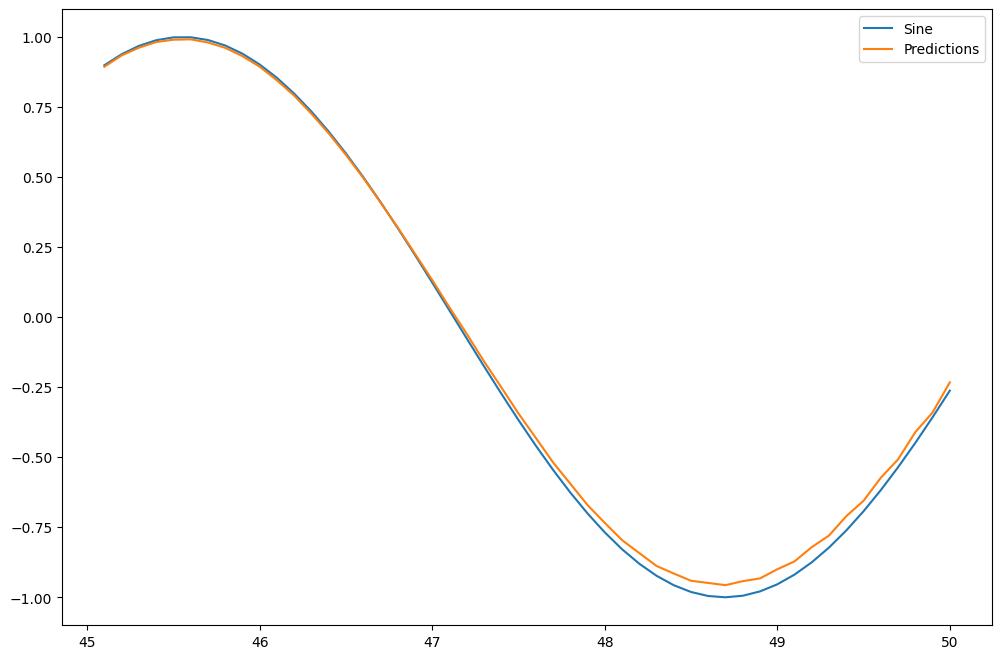

In [124]:
test.plot(figsize=(12,8))

## Adding in Early Stopping and Validation Generator

In [125]:
from keras.callbacks import EarlyStopping

In [126]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [130]:
len(scaled_test)

50

In [131]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)

# it should be scaled_test greater than length
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)


### LSTMS

In [132]:
model = Sequential()

model.add(LSTM(50,input_shape = (length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [133]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20


C:\Users\Emirhan\AppData\Local\Temp\ipykernel_3624\3786894748.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])


402/402 [==============================] - 6s 7ms/step - loss: 0.0178 - val_loss: 3.7101e-05
Epoch 2/20
402/402 [==============================] - 2s 6ms/step - loss: 1.9267e-04 - val_loss: 1.2333e-04
Epoch 3/20
402/402 [==============================] - 2s 5ms/step - loss: 2.0063e-04 - val_loss: 6.5369e-08
Epoch 4/20
402/402 [==============================] - 2s 5ms/step - loss: 2.4616e-04 - val_loss: 3.9243e-06
Epoch 5/20
402/402 [==============================] - 2s 5ms/step - loss: 1.4547e-04 - val_loss: 4.6097e-06


In [134]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


C:\Users\Emirhan\AppData\Local\Temp\ipykernel_3624\2075574314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

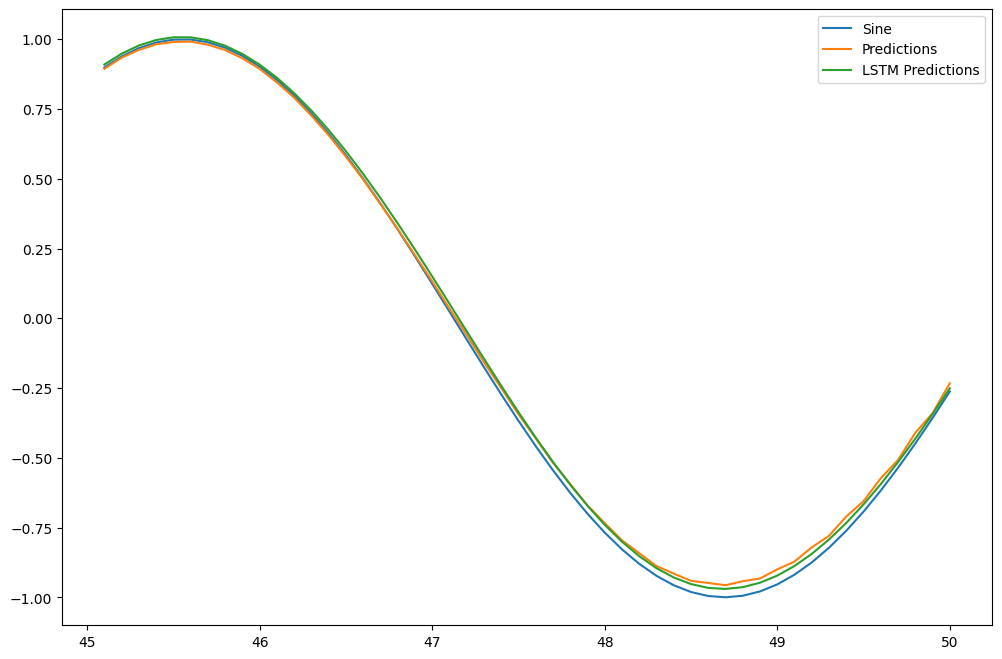

In [135]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [136]:
test

,Sine,Predictions,LSTM Predictions
45.1,0.899097,0.893725,0.909380
45.2,0.938307,0.934103,0.948125
45.3,0.968142,0.961703,0.977593
45.4,0.988304,0.981772,0.997306
45.5,0.998591,0.990204,1.007069
45.6,0.998900,0.991552,1.006832
45.7,0.989229,0.980350,0.996671
45.8,0.969673,0.961331,0.976779
45.9,0.940429,0.931687,0.947447
46.0,0.901788,0.893840,0.909051


### Forecasting

In [137]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [138]:
length = 50
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [139]:
model = Sequential()

model.add(LSTM(50,input_shape = (length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [140]:
model.fit_generator(generator,epochs=6)

Epoch 1/6


C:\Users\Emirhan\AppData\Local\Temp\ipykernel_3624\1408342416.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=6)


451/451 [==============================] - 4s 5ms/step - loss: 0.0158
Epoch 2/6
451/451 [==============================] - 2s 5ms/step - loss: 1.1227e-04
Epoch 3/6
451/451 [==============================] - 3s 6ms/step - loss: 2.3784e-04
Epoch 4/6
451/451 [==============================] - 3s 6ms/step - loss: 2.8013e-04
Epoch 5/6
451/451 [==============================] - 3s 6ms/step - loss: 2.9761e-04
Epoch 6/6
451/451 [==============================] - 3s 6ms/step - loss: 9.3323e-05


In [141]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

    current_pred = model.predict(current_batch)[0]

    forecast.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 34ms/step


In [142]:
forecast = scaler.inverse_transform(forecast)

In [145]:
forecast

array([[-0.14997996],
       [-0.04710007],
       [ 0.05835055],
       [ 0.1653293 ],
       [ 0.27279514],
       [ 0.37967149],
       [ 0.48485496],
       [ 0.58723418],
       [ 0.68571623],
       [ 0.7792583 ],
       [ 0.86689871],
       [ 0.94778252],
       [ 1.02117992],
       [ 1.08649369],
       [ 1.14326166],
       [ 1.1911486 ],
       [ 1.22993946],
       [ 1.25952745],
       [ 1.27990206],
       [ 1.29113816],
       [ 1.29338738],
       [ 1.28686335],
       [ 1.27183499],
       [ 1.2486175 ],
       [ 1.21756182],
       [ 1.17905181],
       [ 1.13349468],
       [ 1.08132005],
       [ 1.02297473],
       [ 0.95892373],
       [ 0.88964676],
       [ 0.81563961],
       [ 0.73741438],
       [ 0.65549847],
       [ 0.57043486],
       [ 0.48278205],
       [ 0.39311235],
       [ 0.30201072],
       [ 0.21007177],
       [ 0.11789797],
       [ 0.02609695],
       [-0.06471989],
       [-0.15393875],
       [-0.24094289],
       [-0.32511023],
       [-0

In [146]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [147]:
len(forecast)

50

In [148]:
50*0.1

5.0

In [150]:
forecast_index = np.arange(50.1,55.1,step=0.1)

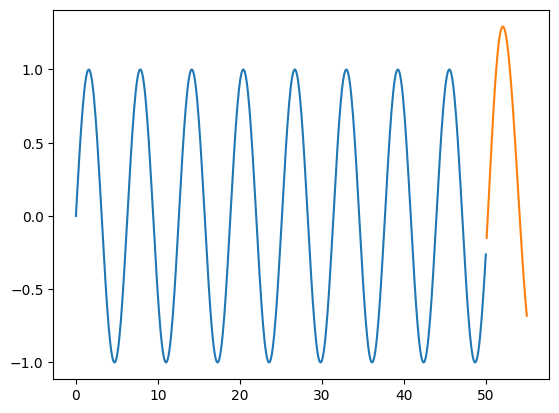

In [152]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)